# Examen Data Scientist - Data analyseren in Python
## Introductie
Voor dit examen is het belangrijk dat je volgende zaken zeker doet:
 - Maak een Vitual Environment aan & exporteer een `.yml` (of soortgelijke) file aan die je toevoegt aan je codebase.
 - Maak een github pagina aan met een bijhorende `.gitignore` en `readme.md`. Voeg een link naar de github repo toe aan je readme file.
 - Zorg dat je op het einde de tijd neemt om je code op te schonen zodat deze begrijpelijk is voor derden.
 - Wanneer je klaar bent, maak een `.zip` bestand van je volledige codebase aan en laad deze op in de leeromgeving.

In deze opgave bekijken we een gesimuleerde dataset over de geboortes in België van 2019. De data is te vinden in `.csv` bestanden die gelabeld zijn met de echte geboortedag van de personen in het bestand. Laat ons bijvoorbeeld even kijken naar de eerste 5 lijnen van het bestand `2019-1-1.csv`:

<table align="center">
  <tr>
    <th>gemeente</th>
    <th>naam</th>
    <th>geslacht</th>
    <th>verwachte datum</th>
  </tr>
  <tr>
    <td>Hooglede</td>
    <td>Elias</td>
    <td>Mannelijk</td>
    <td>01/14/2019</td>
  </tr>
  <tr>
    <td>Sint-Niklaas (Sint-Niklaas)</td>
    <td>Pauline</td>
    <td>Vrouwelijk</td>
    <td>01/05/2019</td>
  </tr>
  <tr>
    <td>Wijnegem</td>
    <td>Anita</td>
    <td>Vrouwelijk</td>
    <td>01/05/2019</td>
  </tr>
  <tr>
    <td>Grâce-Hollogne</td>
    <td>Jean-Paul</td>
    <td>Mannelijk</td>
    <td>01/13/2019</td>
  </tr>
  <tr>
    <td>Boussu</td>
    <td>François</td>
    <td>Mannelijk</td>
    <td>01/26/2019</td>
  </tr>
</table>


Hier hebben we de kolommen:
 - **gemeente**: De gemeente waar de persoon geboren is.
 - **naam**: De voornaam van de persoon.
 - **geslacht**: Het geslacht van de persoon (Mannelijk of Vrouwelijk).
 - **verwachte datum**: De verwachte geboortedatum van de persoon.

Dus hier hebben we dan bijvoorbeeld op de eerste lijn de mannelijke persoon Elias die geboren is in Hooglede waarvan men verwachtte dat hij zou geboren worden op `01/14/2019` (Amerikaans formaat) maar in feite geboren is op 1 januari 2019.

Doorheen deze opgave gaan we de data van dichterbij inspecteren! Je kan deze opgaves alternatief lezen in de bijgeleverde notebook `examen.ipynb` waar ook de (meeste) afbeeldingen & resultaten zichtbaar zijn.

## Stap 1: data inlezen

Maak een lus over alle bestanden in de map `data/geboortes`, lees elk `.csv` bestand in en voeg deze samen tot 1 grote DataFrame. Merk op dat de datum verwerkt zit in de filename, voeg deze toe aan de kleine DataFrames voor je de dataframes samenvoegt met een `pd.concat(dfs)`.

Voeg een extra kolom toe met een `"dag van het jaar"` getal, dus 1 januari 2019 is `1`, 2 januari 2019 is `2`, enzovoort.

**Opmerking**: Er is ook data voor 29 februari 2019, terwijl dit geen schrikkeljaar is! Plaats deze geboortes in een afzonderlijke DataFrame `df_wrong`. Zet in `df_wrong` een extra kolom met een referentie naar waarom deze data foutief is.

In [1]:
# Ik ga eerst een lijst aanmaken met daarin alle dagen (bestandsnaam - '.csv').
# Vervolgens een leeg dataframe aanmaken en via een forloop de data van ieder bestand hieraan toevoegen.

import os
folder_path = r'C:\Users\Carl\Desktop\Syntra - Data Scientist\Notities Lessen\Les 26 - Examen Data Exploration\examen\examen\data\output'

alle_dagen = []  # Hier komen dus alle dagen in

for file in os.listdir(folder_path):  # Via een forloop iedere dag toevoegen aan de list
    alle_dagen.append(file)


print(len(alle_dagen))
print(alle_dagen)

366
['2019-1-1.csv', '2019-1-10.csv', '2019-1-11.csv', '2019-1-12.csv', '2019-1-13.csv', '2019-1-14.csv', '2019-1-15.csv', '2019-1-16.csv', '2019-1-17.csv', '2019-1-18.csv', '2019-1-19.csv', '2019-1-2.csv', '2019-1-20.csv', '2019-1-21.csv', '2019-1-22.csv', '2019-1-23.csv', '2019-1-24.csv', '2019-1-25.csv', '2019-1-26.csv', '2019-1-27.csv', '2019-1-28.csv', '2019-1-29.csv', '2019-1-3.csv', '2019-1-30.csv', '2019-1-31.csv', '2019-1-4.csv', '2019-1-5.csv', '2019-1-6.csv', '2019-1-7.csv', '2019-1-8.csv', '2019-1-9.csv', '2019-10-1.csv', '2019-10-10.csv', '2019-10-11.csv', '2019-10-12.csv', '2019-10-13.csv', '2019-10-14.csv', '2019-10-15.csv', '2019-10-16.csv', '2019-10-17.csv', '2019-10-18.csv', '2019-10-19.csv', '2019-10-2.csv', '2019-10-20.csv', '2019-10-21.csv', '2019-10-22.csv', '2019-10-23.csv', '2019-10-24.csv', '2019-10-25.csv', '2019-10-26.csv', '2019-10-27.csv', '2019-10-28.csv', '2019-10-29.csv', '2019-10-3.csv', '2019-10-30.csv', '2019-10-31.csv', '2019-10-4.csv', '2019-10-5.cs

In [2]:
import numpy as np
import pandas as pd

dfs = []  #lege lijst aanmaken van de dataframes per dag

# Van ieder csv-file een dataframe aanmaken
# We moeten een extra kolom toevoegen die de filename gebruikt als waarde
for file in alle_dagen:
    file_path = os.path.join(folder_path, file)
    df = pd.read_csv(file_path)
    df['geboortedatum'] = file  # Add a new column with the filename
    dfs.append(df)
    
    

# alle dataframes toevoegen aan één algemeen dataframe
df = pd.concat(dfs)

df.head(15)

,gemeente,naam,geslacht,verwachte datum,geboortedatum
0,Hooglede,Elias,Mannelijk,01/14/2019,2019-1-1.csv
1,Sint-Niklaas (Sint-Niklaas),Pauline,Vrouwelijk,01/05/2019,2019-1-1.csv
2,Wijnegem,Anita,Vrouwelijk,01/05/2019,2019-1-1.csv
3,Grâce-Hollogne,Jean-Paul,Mannelijk,01/13/2019,2019-1-1.csv
4,Boussu,François,Mannelijk,01/26/2019,2019-1-1.csv
5,Kraainem,Véronique,Vrouwelijk,01/06/2019,2019-1-1.csv
6,Zottegem,Roel,Mannelijk,01/27/2019,2019-1-1.csv
7,Luik,Lucas,Mannelijk,01/03/2019,2019-1-1.csv
8,Aartselaar,Kristien,Vrouwelijk,01/01/2019,2019-1-1.csv
9,Hannuit,Cécile,Vrouwelijk,01/12/2019,2019-1-1.csv


In [3]:
# We gaan eerst de geboortedatum omzetten naar een datetime-object.
# Stap 1: We splitten de string op het punt en houden het eerste gedeelte over als string.

df['geboortedatum'] = df['geboortedatum'].str.split('.').str[0]


# Stap 2: casten naar datetime
df['geboortedatum'] = pd.to_datetime(df['geboortedatum'], format="%Y-%m-%d")

ValueError: day is out of range for month, at position 144. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [4]:
# Hier zit ik een beetje vast met bovenstaande foutmelding.
# Om het mezelf gemakkelijk te maken (en niet teveel tijd te verliezen), ga ik errors = 'coerce' toepassen.

df['geboortedatum'] = pd.to_datetime(df['geboortedatum'], format="%Y-%m-%d", errors = 'coerce')

In [5]:
df['verwachte datum'] = pd.to_datetime(df['verwachte datum'], format="%m/%d/%Y")

In [6]:
df.tail()

,gemeente,naam,geslacht,verwachte datum,geboortedatum
311,Lede,Lobke,Vrouwelijk,2019-09-12,2019-09-09
312,Westerlo,Willem,Mannelijk,2019-09-04,2019-09-09
313,Brugge,Diane,Vrouwelijk,2019-09-20,2019-09-09
314,Lendelede,Marie-Rose,Vrouwelijk,2019-10-28,2019-09-09
315,Vilvoorde,Sofia,Vrouwelijk,2019-09-05,2019-09-09


In [7]:
# We moeten een extra kolom toevoegen die weergeeft de hoeveelste dag van het jaar dit is. We zagen hiervoor de date2num methode
from matplotlib.dates import date2num


df['dag van het jaar'] = date2num(df['geboortedatum'])

In [8]:
df['dag van het jaar'] = df['dag van het jaar'] - 17896

In [9]:
# Opmerking: Er is ook data voor 29 februari 2019, terwijl dit geen schrikkeljaar is!
# Plaats deze geboortes in een afzonderlijke DataFrame df_wrong.
# Zet in df_wrong een extra kolom met een referentie naar waarom deze data foutief is.

# Ik zie dat deze hier al verdwenen zijn. Wellicht heeft dat te maken met het gebruik van errors = 'coerce' hierboven.
# Voor de volledigheid kan ik ze wel nog in een apart dataframe steken.

df_wrong = pd.read_csv(r'C:\Users\Carl\Desktop\Syntra - Data Scientist\Notities Lessen\Les 26 - Examen Data Exploration\examen\examen\data\output\2019-2-29.csv')

In [10]:
df_wrong.head()

,gemeente,naam,geslacht,verwachte datum
0,Kruisem,Patrick,Mannelijk,02/27/2019
1,Montigny-le-Tilleul,Sarah,Vrouwelijk,03/11/2019
2,Diepenbeek,Valentinus,Mannelijk,03/02/2019
3,Sint-Jans-Molenbeek,El,Mannelijk,02/27/2019
4,Overijse,Apolline,Vrouwelijk,03/03/2019


## Stap 2: Dagelijks aantal geboortes bekijken
#### Vraag 1: Maak een plot van het aantal geboortes per dag van het jaar. 

ValueError: x and y must have same first dimension, but have shapes (366,) and (365,)

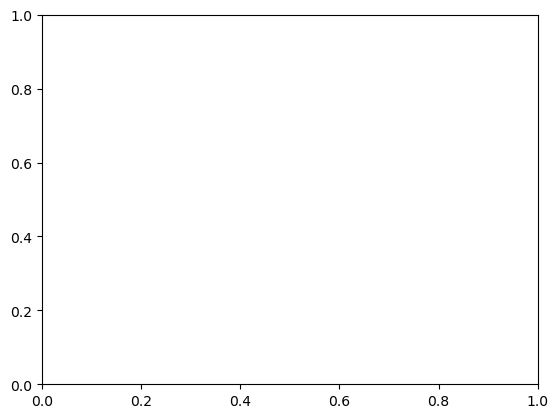

In [11]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

y = df.groupby('dag van het jaar').size()
x = df['dag van het jaar'].unique().tolist()

ax.plot(x, y)

ax.set_xlabel("dag_van_jaar")

plt.show()


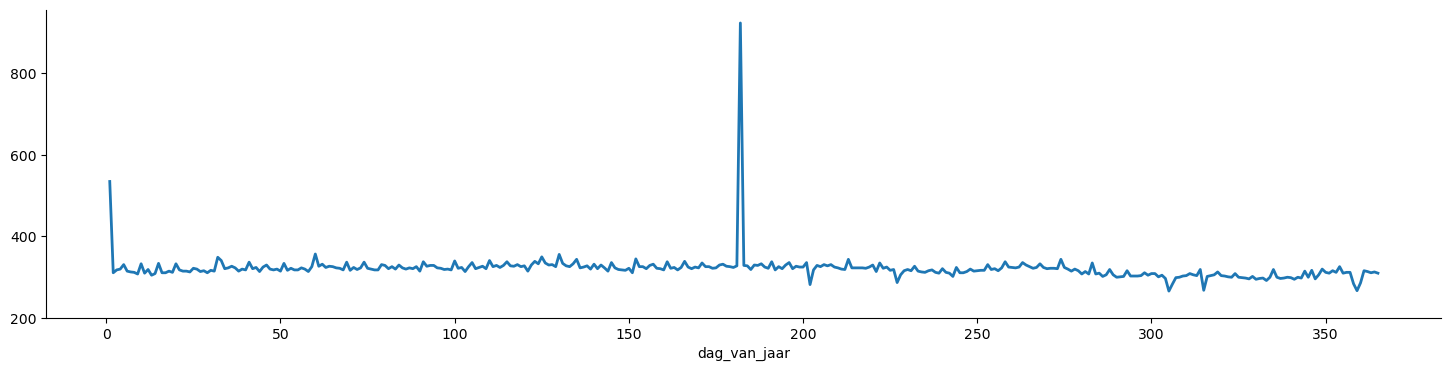

In [12]:
# Kunnen we oplossen op onderstaande wijze:

fig, ax = plt.subplots(figsize=(18, 4))


y = df.groupby('dag van het jaar').size()
x = y.index

ax.plot(x, y, linewidth=2)

ax.set_xlabel("dag_van_jaar")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False) 
plt.yticks([200, 400, 600, 800])  # we maken een list met dezelfde ticks als hierboven

plt.show()


##

#### Vraag 2: Outliers vinden & behandelen

We klassificeren een datum als een outlier als het aantal geboortes meer dan `50%` afwijkt van de gemiddelde waarde overheen de volledige dataset. Zoek alle outliers in de dataset.

In [13]:
# Ik ga opnieuw groupby gebruiken om het aantal rijen te tellen per 'dag van het jaar'
df['geboortes per dag'] = df.groupby('dag van het jaar')['dag van het jaar'].transform('size')

# vervolgens het gemiddelde nemen van deze kolom
gemiddelde = df['geboortes per dag'].mean()
print(gemiddelde)

324.1519212665811


In [14]:
# En nu nagaan voor welke data de waarde onder de 50% of boven de 150% van dit gemiddelde ligt.
# We kunnen via iterrow over het dataframe lopen en kijken wanneer dit het geval is. Deze data kunnen de dan in een lijst plaatsen.
# Om te vermijden dat we over het volledige dataframe moeten lopen en dezelfde datum meerdere keren in de lijst toevoegen,
# kunnen we het dataframe eerst vereenvoudigen naar één van 365 rijen

df_unieke_dagen = df.drop_duplicates(subset='dag van het jaar')


# Lege lijst om de geboortedagen op te slaan
geboortedagen_lijst = []


for index, row in df_unieke_dagen.iterrows():
    if row['geboortes per dag'] < (gemiddelde*0.5) or row['geboortes per dag'] > (gemiddelde*1.5):
        geboortedagen_lijst.append(row['geboortedatum'])

print(geboortedagen_lijst)


[Timestamp('2019-01-01 00:00:00'), Timestamp('2019-07-01 00:00:00')]


In [15]:
# We krijgen een lijst van 2 dagen: 1 januari en 1 juli.

Ik zal je vertellen; de outliers op 1 januari en 1 juli komen doordat alle geboortes waarvoor de datum niet correct genoteerd is, de datum 1 januari (voor de eerste helft van het jaar) en op 1 juli (voor de tweede helft van het jaar) geplaatst worden. Om dit op te lossen, halen we in de grote geboortes DataFrame (met 1 lijn per geboorte) deze twee datums er volledig uit. Dus we gaan **alle** geboortes van 1 januari en 1 juli verwijderen uit deze dataframe en toevoegen aan de `df_wrong` dataframe met als reden `2019-01-01` en `2019-07-01`.

In [16]:
# We houden een dataframe over waar de dagen 1 januari en 1 juli niet in voorkomen
df = df[(df['dag van het jaar'] != 1) & (df['dag van het jaar'] != 182)]

df.head()

,gemeente,naam,geslacht,verwachte datum,geboortedatum,dag van het jaar,geboortes per dag
0,Merksplas,Liliane,Vrouwelijk,2019-01-04,2019-01-10,10.0,332.0
1,Bornem,Jeroen,Mannelijk,2019-01-10,2019-01-10,10.0,332.0
2,Houthalen-Helchteren,Fatima,Vrouwelijk,2019-01-21,2019-01-10,10.0,332.0
3,Lievegem,Hilaire,Mannelijk,2019-01-15,2019-01-10,10.0,332.0
4,Spiere-Helkijn,Christian,Mannelijk,2019-01-16,2019-01-10,10.0,332.0


In [17]:
# Het dataframe start bij 10 januari, wat niet echt logisch is.
# We gaan sorteren op basis van de dag van het jaar en herindexeren.

df = df.sort_values(by='dag van het jaar', ascending=True)
df = df.reset_index(drop=True)
df.head()

,gemeente,naam,geslacht,verwachte datum,geboortedatum,dag van het jaar,geboortes per dag
0,Namen,Sabrina,Vrouwelijk,2018-12-30,2019-01-02,2.0,310.0
1,Waregem,Steven,Mannelijk,2019-01-07,2019-01-02,2.0,310.0
2,Lokeren,Luc,Mannelijk,2018-12-27,2019-01-02,2.0,310.0
3,Nijlen,Eric,Mannelijk,2019-01-02,2019-01-02,2.0,310.0
4,Aat,Catherine,Vrouwelijk,2019-01-01,2019-01-02,2.0,310.0


Maak dezelfde plot nu opnieuw met het aantal geboortes per dag.

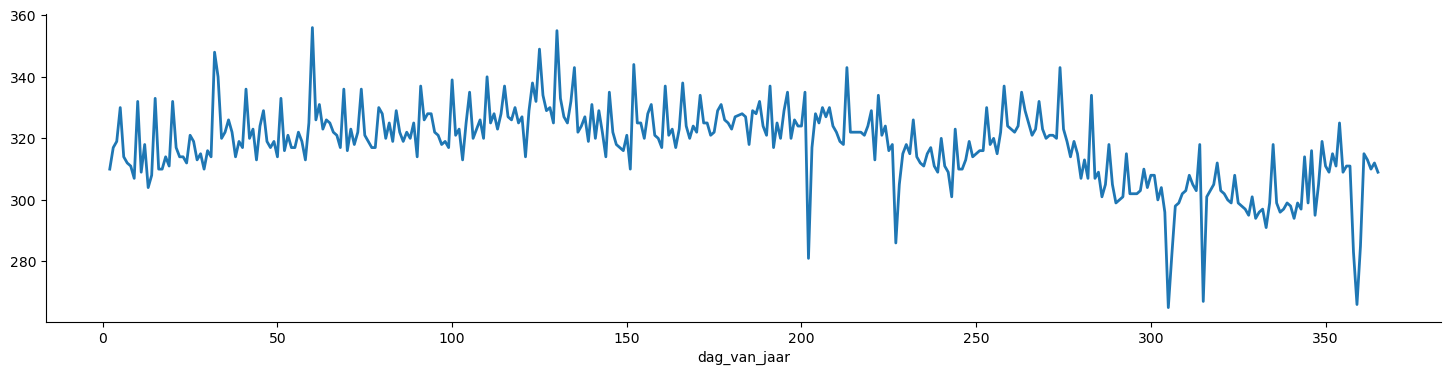

In [18]:
# Nu dus opnieuw plotten...


fig, ax = plt.subplots(figsize=(18, 4))


y = df.groupby('dag van het jaar').size()
x = y.index

ax.plot(x, y, linewidth=2)

ax.set_xlabel("dag_van_jaar")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False) 

plt.show()


 We zien dat er nog steeds redelijk wat uitschieters zijn, kan je code schrijven om de 5 extreme uitschieters in de 2e helft van het jaar identificeren (in totaal 8 datums)?

In [ ]:
# We kunnen eens proberen via de percentielmethode uit de cursus.

In [19]:
# eerst moeten we dus een numpy array aanmaken.
# We maken opnieuw even een tussentijds dataframe met 1 lijn per dag
df_unieke_dagen = df.drop_duplicates(subset='geboortedatum')

# en nu plaatsen we alle waarden uit de kolom 'geboortes per dag' in een array
data = np.array(df_unieke_dagen['geboortes per dag'])


In [20]:
q1 = np.percentile(data, 25)
q3 = np.percentile(data, 75)
iqr = q3-q1

lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)

outliers = np.where((data < lower_bound) | (data > upper_bound)) [0]
print(data[outliers])

[]


In [21]:
# We proberen opnieuw, maar leggen de lower bound wat hoger:
q1 = np.percentile(data, 25)
q3 = np.percentile(data, 75)
iqr = q3-q1

lower_bound = q1 - (0.5 * iqr)


outliers = np.where((data < lower_bound)) [0]
print(data[outliers])

[]


In [22]:
# OK, zo gaan we er dus niet geraken...

In [23]:
# Omwille van tijdsgebrek ga ik enkel op zoek naar de 8 laagste waarden:

# Stap 1: sorteren op basis van geboortes per dag
df_sorted = df_unieke_dagen.sort_values(by='geboortes per dag', ascending=True)

df_sorted.head(8)




,gemeente,naam,geslacht,verwachte datum,geboortedatum,dag van het jaar,geboortes per dag
97003,Aat,Christel,Vrouwelijk,2019-11-08,2019-11-01,305.0,265.0
113283,Sint-Pieters-Leeuw,David,Mannelijk,2020-01-13,2019-12-25,359.0,266.0
99986,Philippeville,Alain,Mannelijk,2019-11-20,2019-11-11,315.0,267.0
64422,Halle (Halle-Vilvoorde),Jessie,Vrouwelijk,2019-07-20,2019-07-21,202.0,281.0
97268,Herstal,Esma,Vrouwelijk,2019-11-14,2019-11-02,306.0,282.0
113000,Kalmthout,Tineke,Vrouwelijk,2019-12-25,2019-12-24,358.0,283.0
113549,Diepenbeek,Stef,Mannelijk,2020-02-16,2019-12-26,360.0,285.0
72474,Hove (Antwerpen),Herman,Mannelijk,2019-08-13,2019-08-15,227.0,286.0


## Stap 3: Onderzoeksvragen
### Onderzoek 1: Unisex namen
#### Een aantal statistieken
Sommige namen zijn unisex, dat wil zeggen dat zij hetzelfde zijn voor mannen en vrouwen. Beantwoord volgende 3 vragen over unisex namen in onze dataset:
 - Hoeveel unisex namen zijn er?
 - Wat is de meest voorkomende unisex naam; hiervoor zoek ik 3 namen (en getallen):
    - De meest populaire unisex naam bij mannen.
    - De meest populaire unisex naam bij vrouwen.
    - De meest popuaire unisex naam.

**Tip:** Neem hiervoor terug de volledige dataset in acht (dus met de foutief geklasseerde namen).

In [24]:
# Om alle unisex namen op te lijsten, ga ik ze eerst in een lijst plaatsen

df_mannen = df[df['geslacht'] == 'Mannelijk']
df_vrouwen = df[df['geslacht'] == 'Vrouwelijk']

namen_mannen = df_mannen['naam'].unique().tolist()
namen_vrouwen = df_vrouwen['naam'].unique().tolist()

unisex_namen = []

for name in namen_mannen:
    if name in namen_vrouwen:
        unisex_namen.append(name)

print(unisex_namen)

['Yannick', 'Sacha', 'Noa', 'Nicky', 'Chris', 'Dominique', 'Jo', 'Sam', 'Flor', 'El', 'Maxime', 'Claude', 'Alexis', 'Niki', 'Charlie', 'Robin', 'Amine', 'Kris', 'Rayan', 'Vivian', 'Michele', 'Luka', 'José', 'Andrea', 'Deniz', 'Kim', 'Tenzin', 'Imran', 'Luca', 'Eden', 'Joni', 'Isa', 'Gabriele', 'Sasha', 'Adama', 'Toby', 'Lou', 'Simone', 'Angel', 'Ilhan', 'Jessy', 'Lenny', 'Mattia', 'Nikola', 'Hedwig', 'Camille', 'Marian', 'Senna', 'Jente', 'Jitse', 'Yan', 'Louka', 'Rosario', 'Yi', 'Noor', 'Islam', 'Merlin', 'Leslie', 'Sandy', 'Nour', 'Rabia', 'Yentl', 'Loeka', 'Nikita', 'Joy', 'Hilal', 'Sai', 'Sanne', 'Yoni', 'Dursun', 'Ihsan', 'Amel', 'Gwen', 'Beau', 'Andréa']


In [25]:
# Om te tellen hoeveel de unisex-namen voorkomen, ga ik een extra kolom toevoegen aan het dataframe: 'is_unisex'
# We gaan dus een nieuwe kolom aanmaken en dan terug over het hele dataframe loopen.
# Als we een naam tegenkomen die in onze lijst staat met unisex-namen, gaan we kolom 'is_unisex' omzetten naar True

df['is_unisex'] = False # nieuwe kolom aanmaken (boolean)


for i, row in df.iterrows():
    if row['naam'] in unisex_namen:
        df.loc[i, 'is_unisex'] = True

df.head()

,gemeente,naam,geslacht,verwachte datum,geboortedatum,dag van het jaar,geboortes per dag,is_unisex
0,Namen,Sabrina,Vrouwelijk,2018-12-30,2019-01-02,2.0,310.0,False
1,Waregem,Steven,Mannelijk,2019-01-07,2019-01-02,2.0,310.0,False
2,Lokeren,Luc,Mannelijk,2018-12-27,2019-01-02,2.0,310.0,False
3,Nijlen,Eric,Mannelijk,2019-01-02,2019-01-02,2.0,310.0,False
4,Aat,Catherine,Vrouwelijk,2019-01-01,2019-01-02,2.0,310.0,False


In [26]:
# Ik ga een dataframe aanmaken met daarin enkel de geboortes van kinderen met unisex namen

df_unisex = df[df['is_unisex'] == True]

# En dan ook nog eens voor mannen en vrouwen apart
df_unisex_mannen = df_unisex[df_unisex['geslacht'] == 'Mannelijk']
df_unisex_vrouwen = df_unisex[df_unisex['geslacht'] == 'Vrouwelijk']

In [27]:
# En nu via value_counts eens kijken welke namen het vaakst voorkomen.

top_3 = df_unisex['naam'].value_counts().head(3)
top_3_mannen = df_unisex_mannen['naam'].value_counts().head(3)
top_3_vrouwen = df_unisex_vrouwen['naam'].value_counts().head(3)

print('De meest popuaire unisex namen:')
print(top_3)
print('\nDe meest popuaire unisex namen bij mannen:')
print(top_3_mannen)
print('\nDe meest popuaire unisex namen bij vrouwen:')
print(top_3_vrouwen)

De meest popuaire unisex namen:
naam
Dominique    390
Maxime       206
Robin        189
Name: count, dtype: int64

De meest popuaire unisex namen bij mannen:
naam
Maxime    200
Robin     181
Claude    165
Name: count, dtype: int64

De meest popuaire unisex namen bij vrouwen:
naam
Dominique    230
Camille      160
Kim          113
Name: count, dtype: int64


We zien dat er een vrij groot aantal namen veel meer voorkomen bij mannen dan vrouwen (en omgekeerd). Dit vinden we eigenlijk geen "echte" unisex namen. We noemen een naam "echt unisex" als de naam niet meer dan 50% meer voorkomt bij 1 van de 2 geslachten. Dus als er `x` mannen en `y` vrouwen zijn genaamd Chris, dan noemen we Chris "echt unisex" als `x <= 1.5 * y` en `y <= x * 1.5`. Filter je unisex dataframe tot een `df_real_unisex` waarbij je enkel de "echte" unisex namen weerhoudt. 
- Beantwoord nu bovenstaande 3 vragen opnieuw voor deze dataset. Hierbij werk je best met een functie zodat je geen code moet herhalen!
- Zijn de echte unisex namen populairder bij mannen of vrouwen, of is de populariteit hetzelfde? Deze vraag kan je beantwoorden door te kijken naar het percentage mannen/vrouwen met een echte unisex naam.

In [28]:
# Ik maak een kolom aan waarbij ik aangeef hoe vaak een naam voorkomt bij mannen en een kolom die weergeeft hoe vaak die voorkomt bij vrouwen.


df_unisex['naam_count_mannelijk'] = df_unisex[df_unisex['geslacht'] == 'Mannelijk'].groupby('naam')['naam'].count()
df_unisex['naam_count_vrouwelijk'] = df_unisex[df_unisex['geslacht'] == 'Vrouwelijk'].groupby('naam')['naam'].count()


C:\Users\Carl\AppData\Local\Temp\ipykernel_50996\3308141386.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_unisex['naam_count_mannelijk'] = df_unisex[df_unisex['geslacht'] == 'Mannelijk'].groupby('naam')['naam'].count()
C:\Users\Carl\AppData\Local\Temp\ipykernel_50996\3308141386.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_unisex['naam_count_vrouwelijk'] = df_unisex[df_unisex['geslacht'] == 'Vrouwelijk'].groupby('naam')['naam'].count()


In [29]:
df_unisex.head()

,gemeente,naam,geslacht,verwachte datum,geboortedatum,dag van het jaar,geboortes per dag,is_unisex,naam_count_mannelijk,naam_count_vrouwelijk
11,Jemeppe-sur-Sambre,Yannick,Mannelijk,2018-12-31,2019-01-02,2.0,310.0,True,NaN,NaN
21,Zoersel,Kim,Vrouwelijk,2019-01-06,2019-01-02,2.0,310.0,True,NaN,NaN
35,Vielsalm,Camille,Vrouwelijk,2019-01-12,2019-01-02,2.0,310.0,True,NaN,NaN
46,Doornik,Sacha,Mannelijk,2019-01-05,2019-01-02,2.0,310.0,True,NaN,NaN
65,Herstal,Noa,Mannelijk,2018-12-28,2019-01-02,2.0,310.0,True,NaN,NaN


In [30]:
# Die code werkt dus niet. Geen tijd meer om andere zaken te proberen.

In [31]:
# In een derde kolom zou ik dan nog de verhouding bekijken en bepalen welke namen écht unisex zijn. Zo iets:
df_unisex['echte_unisex_naam'] = True

for i, row in df_unisex.iterrows():
    if df_unisex['naam_count_mannelijk'] <= (1.5 * unisex['naam_count_vrouwelijk']) and df_unisex['naam_count_vrouwelijk'] <= (1.5 * unisex['naam_count_mannelijk']):
        df_unisex.loc[i, 'echte_unisex_naam'] = False

C:\Users\Carl\AppData\Local\Temp\ipykernel_50996\596332649.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_unisex['echte_unisex_naam'] = True


NameError: name 'unisex' is not defined

#### Visualizatie

Maak een visualizatie die alle echte unisex namen toont en de relatieve voorkomens bij mannen en vrouwen.

### Onderzoek 2: de accuraatheid van de geschatte bevallingsdatum
#### Evolutie vergelijken

Maak een afbeelding van het totaal aantal geboortes per dag en het totaal aantal verwachte geboortes.

**Bonusvraag**: Gewoon om over na te denken: waarom zien de uiteindes van je plot er wat gek uit? Schrijf het antwoord neer in een strategisch geplaatste markdown cel.

#### Verbanden bekijken
Maak een histogram van het aantal dagen dat babies te vroeg geboren werden in 2019 en een scatterplot die het verband toont tussen de verwachte en effectieve geboortedatum.

### Onderzoek 3: Aantal namen versus aantal babies
Naarmate dat er meer babies geboren worden, gaan deze ook meer verschillende namen krijgen. Zolang er weinig babies geboren worden lijkt het logisch dat dit verband min of meer lineair is, maar naarmate dat er meer en meer babies geboren worden lijkt het niet meer logisch dat dit verband lineair blijft. We verwachten bijvoorbeeld niet dat het aantal unieke namen gegeven aan 2 miljoen babies het dubbel is van het aantal unieke namen gegeven aan 1 miljoen babies. Kan je op basis van deze dataset het verband tussen het aantal unieke namen in functie van het aantal babies eens onderzoeken? Hiervoor krijg je geen voorstel tot visualizatie maar moet je zelf mij proberen te overtuigen van je antwoord.